In [1]:
import pandas as pd

dataset= pd.read_csv(r'Downloads/AAPL.csv')
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,49.904999,50.512501,49.787498,50.119999,48.554459,89927600
1,2019-08-13,50.255001,53.035000,50.119999,52.242500,50.610661,188874000
2,2019-08-14,50.790001,51.610001,50.647499,50.687500,49.104229,146189600
3,2019-08-15,50.865002,51.285000,49.917500,50.435001,48.859619,108909600
4,2019-08-16,51.070000,51.790001,50.959999,51.625000,50.012440,110481600
5,2019-08-19,52.654999,53.182499,52.507500,52.587502,50.944878,97654400
6,2019-08-20,52.720001,53.337502,52.580002,52.590000,50.947300,107537200
7,2019-08-21,53.247501,53.412498,52.900002,53.160000,51.499496,86141600
8,2019-08-22,53.297501,53.610001,52.687500,53.115002,51.455906,89014800
9,2019-08-23,52.357498,53.012501,50.250000,50.660000,49.077579,187272000


In [2]:
dataset= dataset.values
open_value= dataset[:,1]
print(open_value[:5])

[49.904999 50.255001 50.790001 50.865002 51.07]


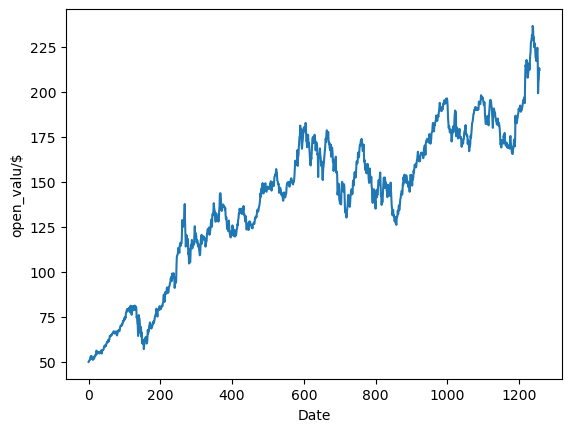

In [3]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('open_valu/$')
plt.show()

In [5]:
open_value= open_value.reshape(-1,1) #convert in to a column vector

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
scaled_open_value= scaler.fit_transform(open_value)

print(open_value[:5].T)
print(scaled_open_value[:5].T)

[[49.904999 50.255001 50.790001 50.865002 51.07]]
[[0.         0.00187593 0.00474341 0.0051454  0.00624414]]


In [6]:
data= []
target= []

window_size= 50
for i in range(0,len(open_value)-window_size):
    data.append(scaled_open_value[i:i+window_size])
    target.append(scaled_open_value[i+window_size])

In [7]:
import numpy as np

data_np= np.array(data)
target_np= np.array(target)

print(data_np.shape)
print(target_np.shape)

(1208, 50, 1)
(1208, 1)


In [8]:
np.save('data',data)
np.save('target',target)